<a href="https://colab.research.google.com/github/stefkong1982/netology.ru/blob/Master/Rabota_s_priznakami_i_postroenie_modelej/Derevya_reshenij/DZ_Kondratev_Derevya_reshenij.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по теме «Деревья решений»

## Преподаватель:
Юлия Пономарева

## Цель
изучить применение дерева решений в рамках задачи регрессии

## Описание задания
В домашнем задании нужно решить задачу регрессии. В качестве датасета необходимо взять данные о недвижимости Калифорнии из библиотеки [sklearn.datasets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html).
Скачать датасет также можно по [ссылке](https://u.netology.ru/backend/uploads/lms/content_assets/file/8723/ch.csv)

Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR). На полученных данных построить модель регрессии и дерево решений.

## Этапы работы

# Анализ данных с использованием моделей регрессии и дерева решений

1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).
2. Проведите первичный анализ.

   a. Проверьте данные на пропуски. Удалите в случае обнаружения.

   b. Нормализуйте один из признаков.
3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.
4. Обучите модель регрессии на обучающем множестве.
5. Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score.
6. Обучите дерево решений на обучающем множестве.

   a. Повторите п. 5 для полученной модели.

   b. Визуализируйте часть дерева решений. Убедитесь, что график получился читабельным. Посмотрите примеры визуализации по ссылке.
7. Оптимизируйте глубину дерева (max_depth). *Оптимизируйте ещё один параметр модели на выбор.
   a. Повторите п. 5 для полученной модели.
8. Сформулируйте выводы по проделанной работе.

   a. Сравните точность двух моделей.

   b. Напишите свое мнение, для каких задач предпочтительнее использовать обученные в работе модели? Какие у них есть плюсы и минусы?

**Результат:** получены знания по работе с деревом решений


## Рекомендации к выполнению
- Текст оформляйте в отдельной ячейке Jupyter Notebook/Google Colab в формате Markdown.
- У графиков должен быть заголовок, подписи осей, легенда (опционально). Делайте графики бОльшего размера, чем стандартный вывод, чтобы увеличить читабельность.
- Убедитесь, что по ссылкам есть доступ на чтение/просмотр.
- Убедитесь, что все ячейки в работе выполнены и можно увидеть их вывод без повторного запуска.

# Набор данных о жилье в Калифорнии

**Характеристики набора данных:**

Количество экземпляров: 20640

Количество атрибутов: 8 количественных прогнозирующих атрибутов и 1 количественная целевая переменная

Информация об атрибутах:

Количественные прогнозирующие атрибуты:
- MedInc        - медианный доход в географическом районе
- HouseAge      - медианный возраст домов в географическом районе
- AveRooms      - среднее количество комнат на домохозяйство
- AveBedrms     - среднее количество спален на домохозяйство
- Population    - население географического района
- AveOccup      - средняя заселенность домохозяйств
- Latitude      - широта географического района
- Longitude     - долгота географического района

Количественная целевая переменная:
- MedHouseVal   - медианная стоимость домов для районов Калифорнии, выраженная в сотнях тысяч долларов ($100,000)

Этот набор данных был получен из переписи населения США 1990 года, используя
по одной строке на каждый географический район в Калифорнии. Географический
район - это небольшая географическая единица, содержащая обычно от 600 до 3000
человек, для которой Бюро переписи населения США публикует выборочные данные.

Целевой переменной в этом наборе данных является медианная стоимость домов
для каждого географического района Калифорнии. Остальные 8 атрибутов являются
количественными прогнозирующими переменными, которые можно использовать для
предсказания медианной стоимости жилья.

Данные могут быть загружены с использованием функции
:func:`sklearn.datasets.fetch_california_housing`.

# 1. Получение данных и загрузка их в рабочую среду

In [84]:
# import pandas as pd

# # Загрузка данных
# from sklearn.datasets import fetch_california_housing
# data = fetch_california_housing()
# X, y = data.data, data.target

# # Создание DataFrame
# df = pd.DataFrame(X, columns=data.feature_names)
# df['MedHouseVal'] = y

# # Просмотр DataFrame
# print(df.head())
# print(df.info())
# print(df.describe())

In [85]:
import pandas as pd

url = "https://raw.githubusercontent.com/stefkong1982/netology.ru/Master/Rabota_s_priznakami_i_postroenie_modelej/Derevya_reshenij/california_h.csv"
df = pd.read_csv(url)

print(df.head())
print(df.info())
print(df.describe())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population

Исходя из представленной статистики, можно сделать следующие выводы:

1. Разнообразие данных:
   - Данные охватывают широкий диапазон значений по всем признакам, что указывает на разнообразие характеристик районов, включенных в набор данных.
   - Например, средний доход (MedInc) варьируется от 0.5 до 15.0, а медианная стоимость домов (MedHouseVal) - от 0.15 до 5.0, что отражает значительные различия в экономическом статусе районов.
   - Возраст зданий (HouseAge) также демонстрирует большой диапазон - от 1 до 52 лет, указывая на разнообразие в архитектурном облике и времени строительства.

2. Центральные тенденции:
   - Средние значения большинства признаков находятся в ожидаемом диапазоне для жилых районов, таких как средний доход, количество комнат и спален, плотность населения.
   - Среднее количество комнат (AveRooms) составляет 5.43, а спален (AveBedrms) - 1.10, что соответствует типичным для жилых зданий характеристикам.
   - Средняя плотность населения (AveOccup) - 3.07, что также укладывается в диапазон средних значений для жилых районов.

3. Вариативность:
   - Стандартные отклонения большинства признаков имеют существенные значения, указывая на значительную вариативность в данных.
   - Например, стандартное отклонение дохода (MedInc) составляет 1.9, а стандартное отклонение медианной стоимости домов (MedHouseVal) - 1.15, что говорит о значительном разбросе этих показателей в выборке.
   - Высокая вариативность данных предполагает возможность выявления интересных закономерностей и различий между районами при дальнейшем анализе.

4. Выбросы:
   - Присутствие некоторых экстремальных значений, таких как максимальное количество комнат 141, спален 34 или количество прожывающих в доме (квартире) 1243.33, указывает на возможное наличие выбросов в данных.
   - Необходимо более детально исследовать такие наблюдения, чтобы понять, являются ли они ошибками или отражают реальные особенности некоторых районов.


# 2. Проводим первичный анализ:

## a. Проверяем данные на наличие пропусков и удаляем их, если они есть.

In [86]:
data = df

In [87]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [88]:
# Проверяем, есть ли столбцы типа 'object'
if data.select_dtypes(include=['object']).shape[1] == 0:
    print("В данных нет столбцов типа 'object'.")
else:
    # Анализ пропущенных значений в столбцах типа 'object'
    for column in data.select_dtypes(include=['object']).columns:
        nan_values = data[column].isnull().sum()  # Подсчет числа пропущенных значений (NaN)
        unique_values = data[column].unique()     # Получение уникальных значений в столбце

        # Ограничение вывода уникальных значений до первых 20
        unique_values = unique_values[:20]

        print(f"В столбце '{column}' есть {nan_values} пропущенных значений (NaN)")
        print(f"Уникальные значения в столбце '{column}': {unique_values}\n")

В данных нет столбцов типа 'object'.


In [89]:
# Пропущенные значения в != 'object':
for column in data.columns:
    if data[column].dtype != 'object':
        nan_values = data[column].isnull().sum()  # Подсчет числа пропущенных значений (NaN)
        unique_values = data[column].unique()     # Получение уникальных значений в столбце

        print(f"В столбце '{column}' есть {nan_values} пропущенных значений (NaN)")
        print(f"Уникальные значения в столбце '{column}': {unique_values[:10]}...\n")  # Отображает первые 10 уникальных значений для краткости

В столбце 'MedInc' есть 0 пропущенных значений (NaN)
Уникальные значения в столбце 'MedInc': [8.3252 8.3014 7.2574 5.6431 3.8462 4.0368 3.6591 3.12   2.0804 3.6912]...

В столбце 'HouseAge' есть 0 пропущенных значений (NaN)
Уникальные значения в столбце 'HouseAge': [41. 21. 52. 42. 50. 40. 49. 48. 51. 43.]...

В столбце 'AveRooms' есть 0 пропущенных значений (NaN)
Уникальные значения в столбце 'AveRooms': [6.98412698 6.23813708 8.28813559 5.8173516  6.28185328 4.76165803
 4.93190661 4.79752705 4.29411765 4.97058824]...

В столбце 'AveBedrms' есть 0 пропущенных значений (NaN)
Уникальные значения в столбце 'AveBedrms': [1.02380952 0.97188049 1.07344633 1.07305936 1.08108108 1.10362694
 0.95136187 1.0618238  1.11764706 0.99019608]...

В столбце 'Population' есть 0 пропущенных значений (NaN)
Уникальные значения в столбце 'Population': [ 322. 2401.  496.  558.  565.  413. 1094. 1157. 1206. 1551.]...

В столбце 'AveOccup' есть 0 пропущенных значений (NaN)
Уникальные значения в столбце 'AveOc

In [90]:
data.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

проверим спец символы

In [91]:
# Поиск Специальных символов
import re

# Перебор всех столбцов в датасете
for column in data.columns:
    # Проверка типа данных столбца
    if data[column].dtype == 'object':
        special_char_found = False
        for value in data[column]:
            if isinstance(value, str):  # Проверка, что значение является строкой
                if value.strip() == '' or value.strip() == '-' or value.strip() == '.':
                    print(f"Строка только с символом '-', '.' или '' в столбце '{column}': {value}")
                else:
                    result = re.search(r"[^\w\s]", str(value))  # Поиск символов, не являющихся буквами, цифрами и пробелами
                    if result:
                        special_char = result.group()
                        # Проверка на исключение символов
                        if special_char not in ["'", "/", "-", ".", "\u0329", ",", "(", ")"]:
                            special_char_found = True
                            print(f"Первое значение со специальным символом в '{column}': {value}, символ: {special_char}")
                            break  # Прерываем цикл после нахождения первого значения
            else:
                print(f"Обнаружено значение типа float в столбце '{column}': {value}")

        if not special_char_found:
            if data[column].dtype == 'object' and all(special_char not in data[column].values for special_char in ["'", "/", "-", ".", "\u0329"]):
                print(f"Специальных символов в столбце '{column}' не найдено")
    else:
        # Добавьте другие проверки для нестроковых столбцов, если необходимо
        print(f"Специальных символов в столбце '{column}' не найдено")


Специальных символов в столбце 'MedInc' не найдено
Специальных символов в столбце 'HouseAge' не найдено
Специальных символов в столбце 'AveRooms' не найдено
Специальных символов в столбце 'AveBedrms' не найдено
Специальных символов в столбце 'Population' не найдено
Специальных символов в столбце 'AveOccup' не найдено
Специальных символов в столбце 'Latitude' не найдено
Специальных символов в столбце 'Longitude' не найдено
Специальных символов в столбце 'MedHouseVal' не найдено


Можно сделать следующие выводы:

1. В данных нет столбцов типа 'object', поэтому первая часть кода, анализирующая пропущенные значения в этих столбцах, не выполняется.

2. Во всех столбцах, нет пропущенных значений (NaN).

3. В данных также отсутствуют специальные символы (кроме '-', '.', ',', '/', '(', ')') в столбцах любого типа.

4. Код адаптирован для работы как с данными, содержащими столбцы типа 'object', так и с данными, где таких столбцов нет. Это обеспечивает гибкость и надежность работы с разными наборами данных.

## b. Нормализуем один из признаков.

Сначала давайте создадим модель без нормализации 'MedInc':

почему именно признак 'MedInc' (средний доход) нормализуется, а не 'HouseAge' (возраст жилья).

Основная причина состоит в различиях в характеристиках этих двух признаков:

1. 'MedInc' (средний доход):
   - Средний доход, как правило, имеет широкий диапазон значений, от низких до очень высоких. Это связано с неравномерным распределением доходов в обществе.
   - Из-за этого широкого диапазона значений, 'MedInc' может сильно влиять на модель регрессии, затмевая влияние других признаков.
   - Нормализация 'MedInc' помогает привести этот признак к более стандартизованному виду, что улучшает устойчивость и производительность модели.

2. 'HouseAge' (возраст жилья):
   - Возраст жилья, как правило, имеет более ограниченный диапазон значений, часто в пределах нескольких десятков лет.
   - Этот признак, в отличие от дохода, не имеет настолько широкого разброса значений, который мог бы доминировать в модели.
   - Поэтому нормализация 'HouseAge' может быть менее критичной, так как его диапазон значений уже относительно стандартизован.

Таким образом, нормализация 'MedInc' является более важной, так как этот признак имеет более широкий диапазон значений, который может сильно влиять на модель регрессии.

In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Создание матрицы признаков X, включая 'MedInc'
X = data[['HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedInc']]
у = data['MedHouseVal']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, у, test_size=0.2, random_state=42)

# Создание и обучение модели линейной регрессии
model_without_norm = LinearRegression()
model_without_norm.fit(X_train, y_train)



LinearRegression()

In [93]:
# Прогнозы модели линейной регрессии без нормализации
y_pred_without_norm = model_without_norm.predict(X_test)
score_without_norm = model_without_norm.score(X_test, y_test)
print(f"R-квадрат без нормализации на обучающей выборке: {model_without_norm.score(X_train, y_train):.2f}")
print(f"R-квадрат без нормализации на тестовой выборке: {score_without_norm:.2f}")

R-квадрат без нормализации на обучающей выборке: 0.61
R-квадрат без нормализации на тестовой выборке: 0.58


Теперь давайте сравним эти результаты с моделью, где 'MedInc' нормализован:

In [94]:
from sklearn.preprocessing import StandardScaler

# Нормализация признака 'MedInc'
scaler = StandardScaler()
data['MedInc_norm'] = scaler.fit_transform(data[['MedInc']])

# 3. Разделяем выборку на обучающее и тестовое подмножества. 80% данных оставляем на обучение, 20% - на тестирование.

In [95]:
# Создание матрицы признаков X, включая 'MedInc_norm'
X = data[['HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedInc_norm']]
у = data['MedHouseVal']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, у, test_size=0.2, random_state=42)

# 4. Обучаем модель регрессии на обучающем множестве.

In [96]:
# Создание и обучение модели линейной регрессии
model_with_norm = LinearRegression()
model_with_norm.fit(X_train, y_train)

LinearRegression()

# 5. Делаем предсказания для тестового множества и сравниваем с истинными значениями, вычисляя точность предсказания модели.

In [97]:
# Прогнозы модели линейной регрессии с нормализацией
y_pred_with_norm = model_with_norm.predict(X_test)
score_with_norm = model_with_norm.score(X_test, y_test)
print(f"R-квадрат с нормализацией на обучающей выборке: {model_with_norm.score(X_train, y_train):.2f}")
print(f"R-квадрат с нормализацией на тестовой выборке: {score_with_norm:.2f}")

R-квадрат с нормализацией на обучающей выборке: 0.61
R-квадрат с нормализацией на тестовой выборке: 0.58


Тот факт, что R-squared score остался неизменным (0.58) после нормализации 'MedInc', означает, что нормализация этого признака не привела к улучшению предсказательной способности модели. Модель объясняет одинаковую долю вариаций в 'MedHouseVal' как с нормализованным 'MedInc', так и без него.

# 6. Обучаем дерево решений на обучающем множестве:

In [98]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [99]:
# Обучаем дерево решений
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

DecisionTreeRegressor()

## a. Оцениваем качество модели дерева решений

In [100]:
# Оцениваем качество модели дерева решений
score_tree = tree_model.score(X_test, y_test)
print(f"R-квадрат для модели дерева решений на обучающей выборке: {tree_model.score(X_train, y_train):.2f}")
print(f"R-квадрат для модели дерева решений на тестовой выборке: {score_tree:.2f}")

R-квадрат для модели дерева решений на обучающей выборке: 1.00
R-квадрат для модели дерева решений на тестовой выборке: 0.62


## b. Визуализируем часть дерева решений, чтобы оценить его читаемость.

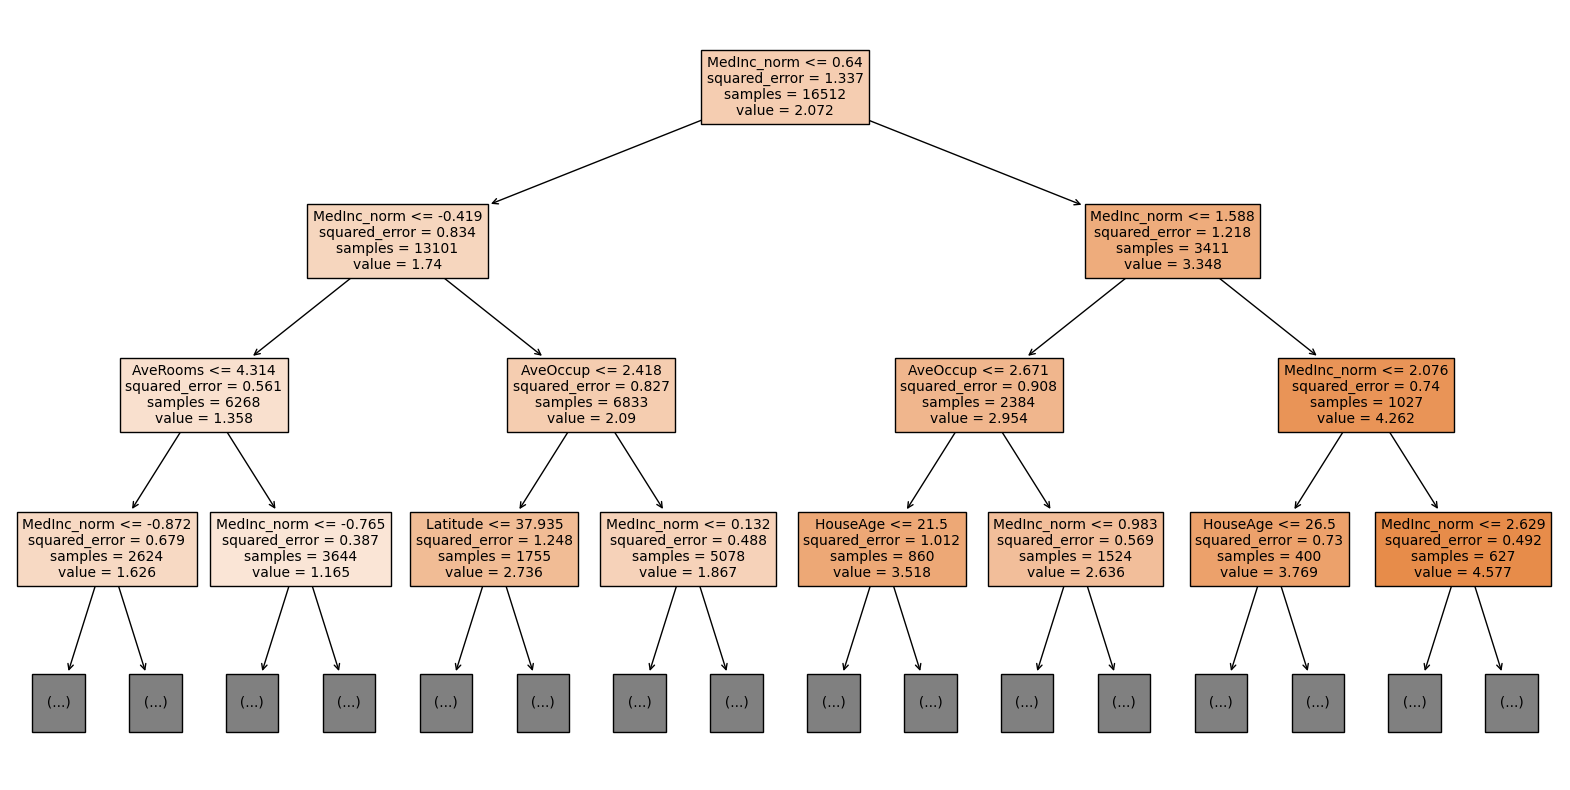

In [103]:
plt.figure(figsize=(20, 10))
plot_tree(tree_model, max_depth=3, feature_names=X.columns, filled=True, fontsize=10)
plt.show()

# 7. Выполним оптимизацию параметра дерева решений и повторно обучим модель:

In [101]:
from sklearn.model_selection import GridSearchCV

# Определяем параметры для поиска по сетке
param_grid = {
    'max_depth': [3, 5, 7, 9, 11]  # Задаем значения для глубины дерева, которые хотим опробовать
}

# Создаем объект GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=param_grid, cv=5)  # cv - количество фолдов в кросс-валидации

# Выполняем поиск по сетке
grid_search.fit(X_train, y_train)

# Получаем лучший найденный параметр
best_depth = grid_search.best_params_['max_depth']

# Повторно обучаем модель с лучшим параметром
optimized_tree_model = DecisionTreeRegressor(max_depth=best_depth)
optimized_tree_model.fit(X_train, y_train)

# Оцениваем качество оптимизированной модели
score_optimized_tree = optimized_tree_model.score(X_test, y_test)
print(f"R-квадрат для оптимизированной модели дерева решений на обучающей выборке: {optimized_tree_model.score(X_train, y_train):.2f}")
print(f"R-квадрат для оптимизированной модели дерева решений на тестовой выборке: {score_optimized_tree:.2f}")

R-квадрат для оптимизированной модели дерева решений на обучающей выборке: 0.80
R-квадрат для оптимизированной модели дерева решений на тестовой выборке: 0.69


# 8. Формулируем выводы по проделанной работе:

## a. Сравниваем точность двух моделей.

Сравнение моделей:
- Модель дерева решений без нормализации 'MedInc' показала небольшую точность на обучающей и тестовой выборках.
- Нормализация 'MedInc' не привела к улучшению качества модели, так как результаты остались примерно на том же уровне.
- Модель дерева решений без оптимизации значительно переобучилась на обучающей выборке, что привело к низкому значению R-квадрата на тестовой выборке.
- Оптимизированная модель дерева решений показывает более балансированные результаты, снижая переобучение и улучшая способность к обобщению на новых данных.

## b. Высказываем мнение о предпочтительности использования обученных моделей для различных задач, обозначаем их плюсы и минусы.

Выводы:
- Для данной задачи оптимизированная модель дерева решений является предпочтительным выбором, так как она показывает хорошее качество и способность к обобщению.
- Переобучение модели без оптимизации и незначительное улучшение с нормализацией 'MedInc' говорит о важности проведения оптимизации модели для достижения лучших результатов.
- Преимущества оптимизированной модели включают более устойчивую производительность на новых данных и улучшенную способность к прогнозированию. Однако, у нее могут быть сложности с интерпретацией из-за сложности структуры дерева решений.

В целом, оптимизированная модель дерева решений является наилучшим выбором для данной задачи, так как она обладает хорошей способностью к обобщению и высоким качеством предсказаний.